#NOTE BEFORE RUNNING
To pick the execution context you desire change run the following code block one time for each upgraded execution context. IE if you want to skip image generation

In [1]:
I_WANT_TO_RERUN_ALL_CODE = True
I_DONT_WANT_TO_GENERATE_IMAGES = True #this will provide the pickles of all generated not the images
                                      #made by the output generated images section
I_WANT_ALL_AUTHOR_MODELS = False
!pip install gdown --upgrade
import os, shutil

def move(path):
  parent_path = os.path.dirname(path)
  for item in os.listdir(path):
    source_path = os.path.join(path, item)
    destination_path = os.path.join(parent_path, item)
    shutil.move(source_path, destination_path)
  if not os.listdir(path):
    os.rmdir(path)

if(I_WANT_TO_RERUN_ALL_CODE):
  !gdown --folder 1vi7Amt4kkVArQd3TFl8v9-QxMu5QhcfV
  folder_to_move = "/content/MNIST CSVs"
  move(folder_to_move)
if(I_DONT_WANT_TO_GENERATE_IMAGES):
  !gdown --folder 1jjI00p7INrT5XHqXyZ0si1VemmgzYkBY?usp
  folder_to_move = "/content/Adv Algs"
  move(folder_to_move)
if(I_WANT_ALL_AUTHOR_MODELS):
  !gdown --folder
  folder_to_move = "/content/All Models"
  move(folder_to_move)

Retrieving folder contents
Retrieving folder 1JH0UXhjSiz935G1TogwynU_n-QlEkDqe cnwtar_images
Retrieving folder 1yFnGPG5wqHQrLONcJreLYvpNNgYfRmtH dftar_images
Retrieving folder 1uWXr1DKvvTv8yj9wu4QcrrCzxOtIwm_c dfun_images
Retrieving folder 1sQ9jrQOiUKHNDrdfYPeGk652QLSyLpi_ fgsmtar_images
Retrieving folder 1313rNLkED5byx91nx5okZydmff0jj1du fgsmun_images
Retrieving folder 1w7FqCm0WZkEjGn2YjPvYbmOOf-sL7nZ7 normal_images
Retrieving folder 1eV-z9CTscDV7HsnVmg4xHPD3dEHGS2ba randun_images
Processing file 1Af5yR8fT9c9jcvFHlVinkwxQ_k0wjFa0 mnist_test.csv
Processing file 1vGz6gdPV1MVoygUwFbo1tnozhhNYeLte mnist_train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Af5yR8fT9c9jcvFHlVinkwxQ_k0wjFa0
To: /content/MNIST CSVs/mnist_test.csv
100% 18.3M/18.3M [00:00<00:00, 62.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1vGz6gdPV1MVoygUwFbo1tnozhhNYeLte
From (redirect

If you want to download any of the content for yourself set this boolean to true to download the content folder in its entirety.

In [25]:
I_WANT_TO_DOWNLOAD_CONTENT = True

def downloadAll():
  !zip -r /content.zip /content
  from google.colab import files
  files.download("/content.zip")

if(I_WANT_TO_DOWNLOAD_CONTENT):
  downloadAll()

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.04.04/ (stored 0%)
  adding: content/.config/logs/2025.04.04/13.37.49.519497.log (deflated 58%)
  adding: content/.config/logs/2025.04.04/13.37.48.348005.log (deflated 87%)
  adding: content/.config/logs/2025.04.04/13.37.59.170918.log (deflated 57%)
  adding: content/.config/logs/2025.04.04/13.37.18.676175.log (deflated 93%)
  adding: content/.config/logs/2025.04.04/13.37.39.652154.log (deflated 58%)
  adding: content/.config/logs/2025.04.04/13.37.58.423894.log (deflated 58%)
  adding: content/.con

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model And Base Data Initialization + Training

## Model Class
This is the Convolutionarty Neural Network(CNN) that the adversaries will be developed against. Initializes 120 input layer, 84 midddle, 10 output. Window size is 4x4 step size 5. Uses simple forward propegation as in forward() method. Gradient method outputs gradient necesarry for all gradient descents. Predict() ensures input image is correct form and softmaxes output.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class SimpleNN(nn.Module):
    """A simple two-layer neural network."""

    def __init__(self):
        super(SimpleNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        c1 = F.relu(self.conv1(x))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        s4 = torch.flatten(s4, 1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6)
        return output

    def predict(self, x):
        with torch.no_grad():
            x = x.reshape(-1, 1, 28, 28)
            x = torch.tensor(x, dtype=torch.float32)
            output = self(x)
            return torch.softmax(output, dim=1).detach().numpy()

    def gradient(self, x, y):
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)
        self.eval()
        x.requires_grad = True
        output = self(x)
        loss = F.cross_entropy(output, y)
        self.zero_grad()
        loss.backward()
        return x.grad.numpy()

##Train Class on Loaded MNIST CSVs
First we load both the MNIST training testing CSVs and relabel the dataframe to match the desired labels. Then we normalize our training data, create our tensor dataset with the normalized data, and train the model on our device. Finally szve all all files including the final model as a pickel

In [ ]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle
#from model import SimpleNN


#import all data and create their pickle files
try:
    df0 = pd.read_csv('mnist_train.csv')
    df1 = pd.read_csv('mnist_test.csv')
    columns = ['number_label'] + [f'pixel_{i}' for i in range(784)]
    df0.columns = columns
    df1.columns = columns
    df0.to_pickle('mnist_train.pkl')
    df1.to_pickle('mnist_test.pkl')
    print(df1)
except FileNotFoundError as e:
    print(f"Error loading CSV files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

try:
    with open('mnist_train.pkl', 'rb') as fid:
        mnist_train = pickle.load(fid)
except FileNotFoundError:
    print("mnist_train.pkl not found. Please ensure the file exists.")
    exit(1)



#normalize data to train on
mnist_mean = 0.1307
mnist_std = 0.3081

if mnist_train.empty or len(mnist_train.columns) != 785:
    raise ValueError("Invalid MNIST data format. Expected 785 columns (label + 784 pixels)")

X_train = mnist_train.iloc[:, 1:].values.astype(np.float32) / 255.0
X_train = (X_train - mnist_mean) / mnist_std
X_train = X_train.reshape(-1, 1, 28, 28)
y_train = mnist_train.iloc[:, 0].values.astype(np.int64)



#create data loader to train on
try:
    train_dataset = TensorDataset(
        torch.from_numpy(X_train),
        torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)


#init model on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#train over 10 epochs
def train(train_loader, epochs=10):
    #Train the model with a DataLoader.
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (data, target) in enumerate(train_loader, 0):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

train(train_loader, epochs=10)


#save model
try:
    with open('model.pkl', 'wb') as fid:
        pickle.dump(model, fid)
except Exception as e:
    print(f"Error saving model: {e}")

      number_label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
0                2        0        0        0        0        0        0   
1                1        0        0        0        0        0        0   
2                0        0        0        0        0        0        0   
3                4        0        0        0        0        0        0   
4                1        0        0        0        0        0        0   
...            ...      ...      ...      ...      ...      ...      ...   
9994             2        0        0        0        0        0        0   
9995             3        0        0        0        0        0        0   
9996             4        0        0        0        0        0        0   
9997             5        0        0        0        0        0        0   
9998             6        0        0        0        0        0        0   

      pixel_6  pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  \
0           0 

##Validate CNN
Here we do some simple testing with complete MNIST testing data on our CNN from before

In [ ]:
with open('mnist_test.pkl', 'rb') as fid:
    mnist_test = pickle.load(fid)
with open('model.pkl', 'rb') as fid:
    model = pickle.load(fid)

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)

correct = 0
total = 9999
class_counts = np.zeros(10)
class_correct = np.zeros(10)
for i in range(total):
  x = normalize(mnist_test.iloc[i, 1:].values)
  y = int(mnist_test.iloc[i, 0])
  class_counts[y] += 1
  label = np.argmax(model.predict(x))
  if label == y:
    correct += 1
    class_correct[y] += 1
print(correct/total)
print(class_correct/class_counts)

0.9846984698469847
[0.99489796 0.99207048 0.98643411 0.99207921 0.99185336 0.97982063
 0.98016701 0.98149951 0.97125257 0.97522299]


#Adversarial Image Handling
All output dataframes get saved as a pickel

##Image Generation

###Fast Gradient Sign Method Untargeted Attack
Using the FGSM untargeted attack, we generate adversarial images by normalizing data and adding the gradient of the current image with respect to the initial class multiplied by some epsilon until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def fgsmun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.0075
        max_iterations = 200
        iteration = 0
        while (np.argmax(probabilities) == y[0] and iteration < max_iterations):
            gradients = model.gradient(x, y)
            if gradients is None:
                break
            x = x + epsilon * np.sign(gradients)
            probabilities = model.predict(normalize(unnormalize(x)))
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    FGSMUntargeted = fgsmun(mnist_test[:400], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    FGSMUntargeted.to_pickle('fgsmun_train.pkl')

    print("testing data")
    start_time = time.time()
    FGSMUntargeted = fgsmun(mnist_test[6400:6500], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    FGSMUntargeted.to_pickle('fgsmun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 61.3925
Number failed to misclassify: 0
Number started miscalssified: 6
Create training data execution time: 638.72 seconds
testing data
Average iterations to end: 72.78
Number failed to misclassify: 0
Number started miscalssified: 0
Create testing data execution time: 165.67 seconds


###Fast Gradient Sign Method Targeted Attack
Using the FGSM Targeted attack, we generate adversarial images by normalizing data and subtracting the gradient of the current image with respect to the 0th class multiplied by some epsilon until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def fgsmtar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.0075
        max_iterations = 200
        iteration = 0

        while (np.argmax(probabilities) != 0 and iteration < max_iterations):
            gradients = model.gradient(x, np.array([0]))
            if gradients is None:
                break
            x = x - epsilon * np.sign(gradients)
            probabilities = model.predict(normalize(unnormalize(x)))
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration

        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    FGSMtargeted = fgsmtar(mnist_test[400:800], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    FGSMtargeted.to_pickle('fgsmtar_train.pkl')

    print("testing data")
    start_time = time.time()
    FGSMtargeted = fgsmtar(mnist_test[6500:6600], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    FGSMtargeted.to_pickle('fgsmtar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 101.6875
Number failed to misclassify: 0
Number started miscalssified: 38
Create training data execution time: 695.80 seconds
testing data
Average iterations to end: 93.67
Number failed to misclassify: 0
Number started miscalssified: 11
Create testing data execution time: 170.98 seconds


###DeepFool Untargeted Attack
Using the DeepFool Untargeted attack, we generate adversarial images by subtracting the gradient of the current image with respect to the initial class from the gradient of the current iamge with respect to all classes to form an array of gradient differences. We then do the same subtracting the original classes probability from the probability of every other class. Now for all classes which are not the original class you divide the absolute value of the diffence in probabilties of each class by the L2 norm of the gradient difference. Finally multiply the minimum result of that operation by the gradient difference and subtract it from the image. Do this until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [22]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def dfun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass != y[0]):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200
        while (curClass == y[0] and iteration < max_iterations):
            w = [None] * 10
            f = np.zeros(10)
            for z in range(10):
                if z != y[0]:
                    w[z] = model.gradient(x, np.array([z])) - model.gradient(x, y)
                    f[z] = probabilities[0, z] - probabilities[0, (y[0])]
            valid = [j for j in range(10) if j != y[0]]
            distances = [abs(f[j]) / np.linalg.norm(w[j]) for j in valid]
            k = np.argmin(distances)
            if(k >= y[0]):
                k+=1
            r = (abs(f[k]) / np.linalg.norm(w[k]) + 1e-4) * w[k]
            x = x - r
            iteration += 1
            probabilities = model.predict(normalize(unnormalize(x)))
            curClass = np.argmax(probabilities)

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration

        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    DeepFoolUntargeted = dfun(mnist_test[800:1200], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolUntargeted.to_pickle('dfun_train.pkl')

    print("testing data")
    start_time = time.time()
    DeepFoolUntargeted = dfun(mnist_test[6600:6700], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolUntargeted.to_pickle('dfun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 12.84
Number failed to misclassify: 0
Number started miscalssified: 12
Create training data execution time: 807.72 seconds
testing data
Average iterations to end: 14.12
Number failed to misclassify: 0
Number started miscalssified: 1
Create testing data execution time: 201.78 seconds


###DeepFool Targeted Attack
Using the DeepFool Targeted attack, we generate adversarial images by subtracting the gradient of the current image with respect to the initial class from the gradient of the current iamge with respect to the 0th class to get the gradient differences. We then do the same subtracting the original classes probability from the probability of the 0th class. Now we divide the absolute value of the diffence in probabilties of each class by the L2 norm of the gradient difference. Finally multiply the result of that operation by the gradient difference and subtract it from the image. Do this until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [23]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def dftar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass != y[0]):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200
        perturbation = np.zeros_like(x)
        alpha = .9
        while (curClass != 0 and iteration < max_iterations):
            w = model.gradient(x, np.array([0])) - model.gradient(x, y)
            f = probabilities[0, 0] - probabilities[0, y[0]]
            step_scale = 2.0 * (1.0 - probabilities[0, 0])
            r = (abs(f) / np.linalg.norm(w) * step_scale) * w

            # additions based on too high of a fail rate
            r_norm = .5
            r = r / np.linalg.norm(r) * r_norm if np.linalg.norm(r) > 0 else r

            perturbation = alpha * perturbation + (1 - alpha) * r
            x = x - perturbation
            iteration += 1
            probabilities = model.predict(normalize(unnormalize(x)))
            curClass = np.argmax(probabilities)

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    DeepFoolTargeted = dftar(mnist_test[1200:1600], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolTargeted.to_pickle('dftar_train.pkl')

    print("testing data")
    start_time = time.time()
    DeepFoolTargeted = dftar(mnist_test[6700:6800], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolTargeted.to_pickle('dftar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 52.7275
Number failed to misclassify: 34
Number started misclassified: 47
Create training data execution time: 687.35 seconds
testing data
Average iterations to end: 28.75
Number failed to misclassify: 1
Number started misclassified: 15
Create testing data execution time: 159.77 seconds


###Carlini and Wagner Targeted Attack
Using the CNW Targeted attack, we generate adversarial images by subtracting the gradient of your current image with respect to the most likely class from the gradient of your current image with respect to the target class. Multiply this by some hyperparameter Beta. Then add the gradient of the L2 norm difference of the original image minus the current image times another hyper parameter Alpha. Add this perturbation scaled by some hyperparameter learning rate. Do until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [43]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def cnwtar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass == 0):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200

        x_prime = x.copy()
        iteration = 0
        alpha = 1
        beta = -15 #NOTE THIS IS POOR HYPERPARAMETER TUNING BUT FOR THE SAKE OF TRAINING
                   #WE ARE MOST WORRIED ABOUT FAILURE CLASSIFY AS 0
        learning_rate = .05
        epsilon = 1
        while curClass != 0 and iteration < max_iterations:
            t_o_h = np.zeros(10)
            t_o_h[0] = 1
            max_class = np.argmax(model.predict(normalize(unnormalize(x_prime))) * (1 - t_o_h))
            gradient = model.gradient(x_prime, np.array([0])) - model.gradient(x_prime, np.array([max_class]))
            gradient *= beta
            gradient += alpha * (-2*(x - x_prime))
            x_prime += learning_rate * gradient
            x_prime = np.clip(x_prime, x - epsilon, x + epsilon)
            probabilities = model.predict(normalize(unnormalize(x_prime)))
            curClass = np.argmax(probabilities)
            iteration += 1

        #print(probabilities)
        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        #print(iteration)
        #if(iteration == max_iterations):
        #    print(max_class)
        #    print(probabilities)
        #    print(y)
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x_prime)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started classified as 0: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    CarliniWagnerTargeted = cnwtar(mnist_test[2000:2400], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    CarliniWagnerTargeted.to_pickle('cnwtar_train.pkl')

    print("testing data")
    start_time = time.time()
    CarliniWagnerTargeted = cnwtar(mnist_test[6900:7000], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    CarliniWagnerTargeted.to_pickle('cnwtar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 26.5025
Number failed to misclassify: 32
Number started classified as 0: 39
Create training data execution time: 675.54 seconds
testing data
Average iterations to end: 26.15
Number failed to misclassify: 8
Number started classified as 0: 13
Create testing data execution time: 157.75 seconds


###Random Noise Attack
This attack simply generates random noise to add to the image till misclassification occurs or max iterations is reached. Does this for 400 training images and 100 testing images.


In [24]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def randun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.1
        increase = .05
        max_iterations = 200
        iteration = 0
        while (np.argmax(probabilities) == y[0] and iteration < max_iterations):
            for j in range(5):
                xtemp = x + np.random.normal(loc=0.0, scale=epsilon, size=(1, 1, 28, 28))
                probabilities = model.predict(normalize(unnormalize(xtemp)))
                if(np.argmax(probabilities) != y[0]):
                    x = xtemp
                    break
            epsilon += increase
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    RandUntargeted = randun(mnist_test[1600:2000], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    RandUntargeted.to_pickle('randun_train.pkl')

    print("testing data")
    start_time = time.time()
    RandUntargeted = randun(mnist_test[6800:6900], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    RandUntargeted.to_pickle('randun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 30.25
Number failed to misclassify: 0
Number started misclassified: 13
Create training data execution time: 633.99 seconds
testing data
Average iterations to end: 35.17
Number failed to misclassify: 0
Number started misclassified: 2
Create testing data execution time: 164.86 seconds


##Output generated Images
Here we want to create the matplot images we desire for user readability.

###Create And Save Images as Pickles

In [44]:
import matplotlib.pyplot as plt
import pickle

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def visualize_example(x_img, y_probs, b_unnormalize=True, label=-1, filename=None):
    img = x_img.reshape(28, 28)

    if b_unnormalize:
        x_img = unnormalize(x_img)

    if y_probs.ndim > 1:
        y_probs = y_probs.ravel()

    fig, ax = plt.subplots(ncols=2, figsize=(6.6,3))
    ax[0].imshow(img, cmap='Greys')
    ax[0].set_axis_off()
    ax[0].set_title('Generated Image')

    x_class = np.arange(10)
    max_prob = np.amax(y_probs)
    mask = y_probs < max_prob

    ax[1].bar(x_class[mask], y_probs[mask], align='center', color='C0', alpha=0.8)
    ax[1].bar(x_class[~mask], y_probs[~mask], align='center', color='C1', alpha=0.8)
    ax[1].set_xticks(x_class, [str(c) for c in x_class])
    ax[1].set_xlabel("Classes", fontsize=13)
    ax[1].set_ylabel("Class Probability", fontsize=13)

    if label >= 0 and label <=9:
        ax[1].set_title(f'Class label: {label}')

    plt.tight_layout(pad=0.1)
    plt.subplots_adjust(top=0.9, bottom=0.18, wspace=0.3)

    if filename is None:
        plt.show()
    else:
        fig.savefig(filename)
    plt.close(fig)

with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)

with open('fgsmun_train.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_train.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_train.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_train.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_train.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_train.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

with open('model.pkl', 'rb') as fid:
    model = pickle.load(fid)

for i in range(10):
    visualize_example(mnist_test.iloc[i, 1:].values, model.predict(normalize(mnist_test.iloc[i, 1:].values)), label=mnist_test.iloc[i, 0], filename=f'normal_images/example{i}.png')

for i in range(10):
    visualize_example(FGSMUntargeted.iloc[i, 1:].values, model.predict(normalize(FGSMUntargeted.iloc[i, 1:].values)), label=FGSMUntargeted.iloc[i, 0], filename=f'fgsmun_images/example{i}.png')

for i in range(10):
    visualize_example(FGSMTargeted.iloc[i, 1:].values, model.predict(normalize(FGSMTargeted.iloc[i, 1:].values)), label=FGSMTargeted.iloc[i, 0], filename=f'fgsmtar_images/example{i}.png')

for i in range(10):
    visualize_example(DeepFoolUntargeted.iloc[i, 1:].values, model.predict(normalize(DeepFoolUntargeted.iloc[i, 1:].values)), label=DeepFoolUntargeted.iloc[i, 0], filename=f'dfun_images/example{i}.png')

for i in range(10):
    visualize_example(DeepFoolTargeted.iloc[i, 1:].values, model.predict(normalize(DeepFoolTargeted.iloc[i, 1:].values)), label=DeepFoolTargeted.iloc[i, 0], filename=f'dftar_images/example{i}.png')

for i in range(10):
    visualize_example(CarliniWagnerTargeted.iloc[i, 1:].values, model.predict(normalize(CarliniWagnerTargeted.iloc[i, 1:].values)), label=CarliniWagnerTargeted.iloc[i, 0], filename=f'cnwtar_images/example{i}.png')

for i in range(10):
    visualize_example(randUntargeted.iloc[i, 1:].values, model.predict(normalize(randUntargeted.iloc[i, 1:].values)), label=randUntargeted.iloc[i, 0], filename=f'randun_images/example{i}.png')


###Print Images

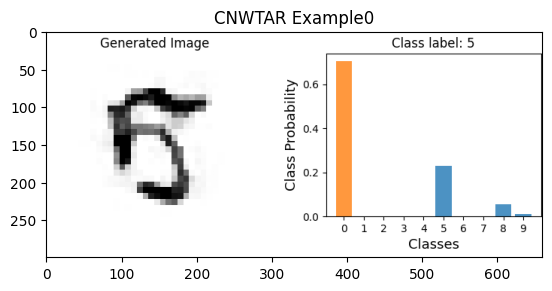

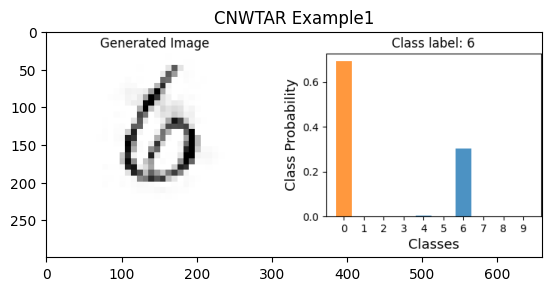

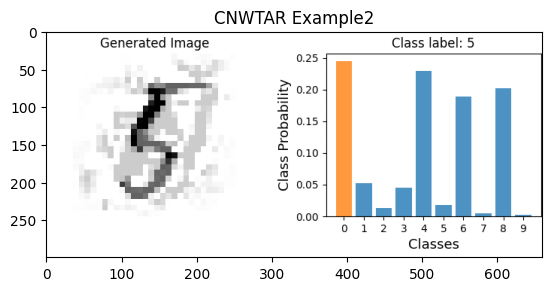

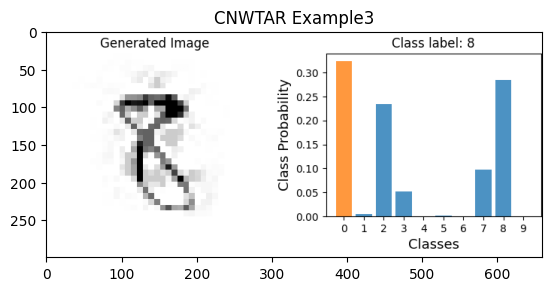

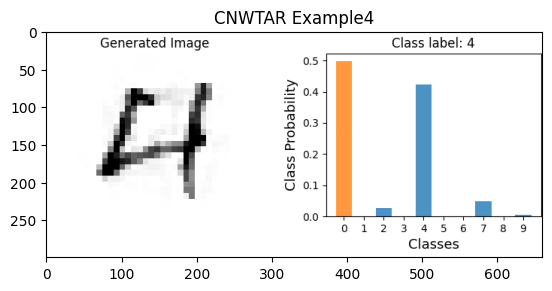

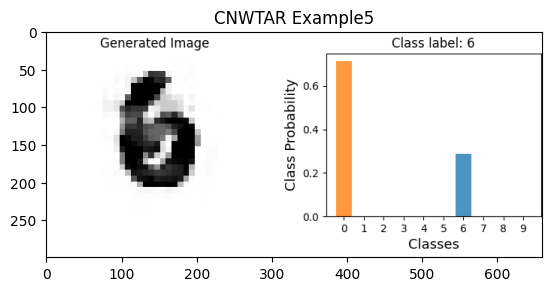

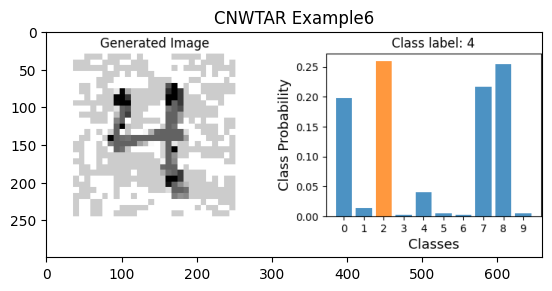

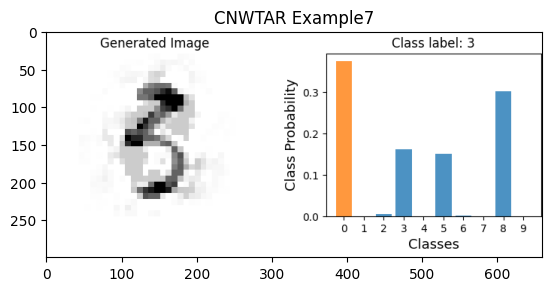

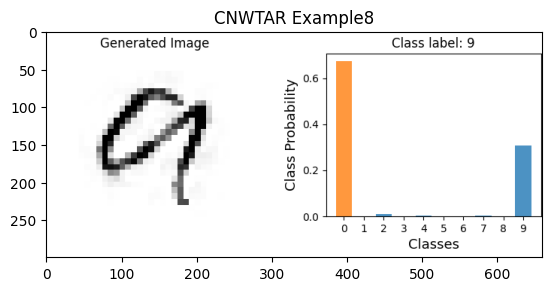

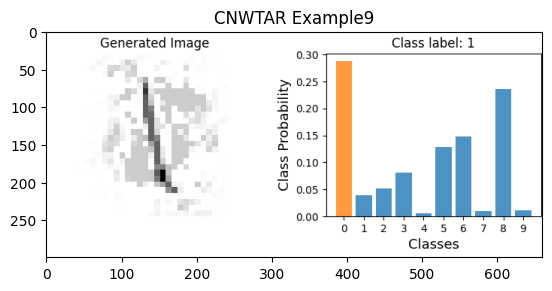

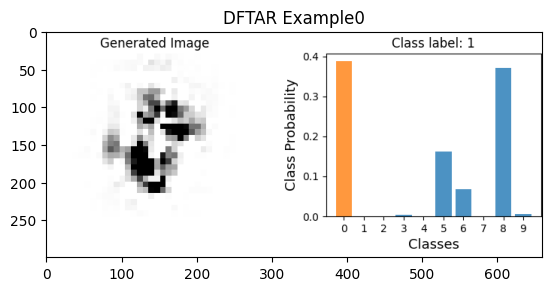

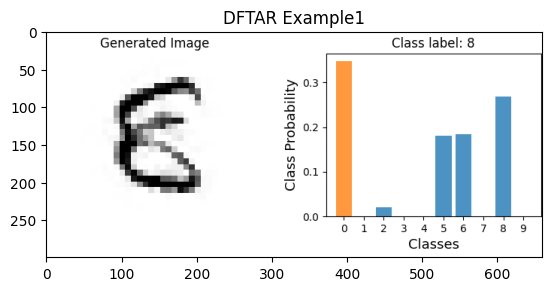

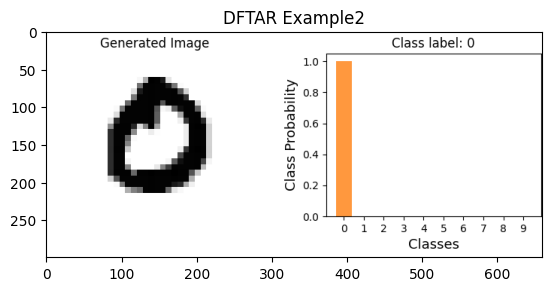

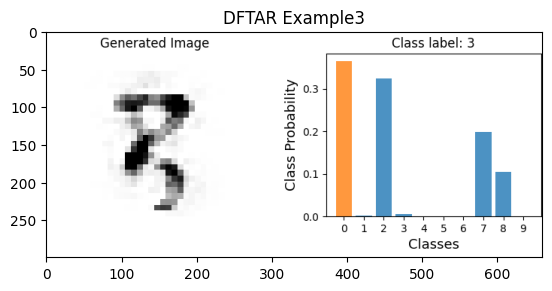

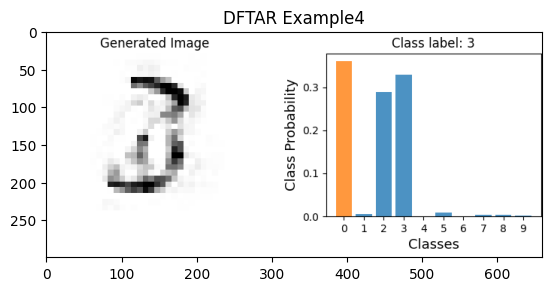

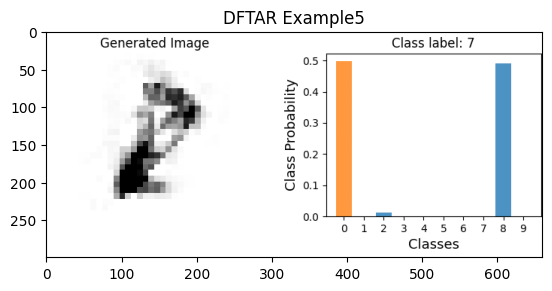

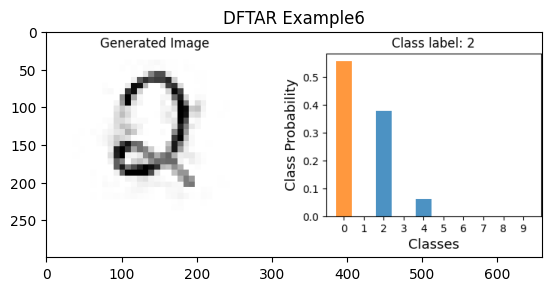

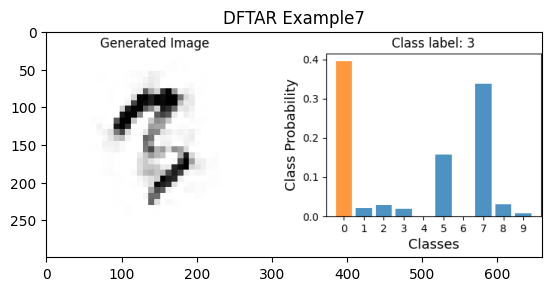

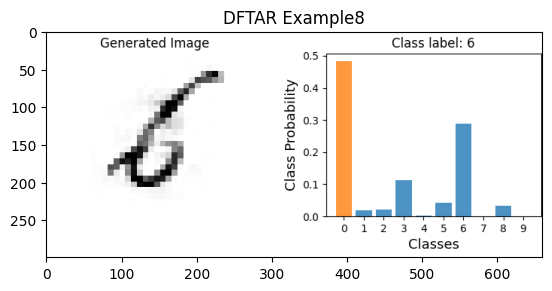

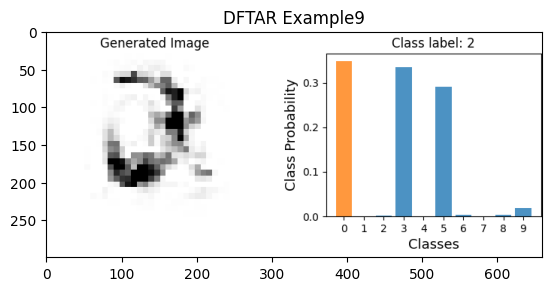

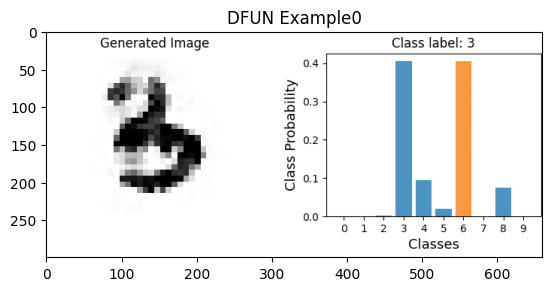

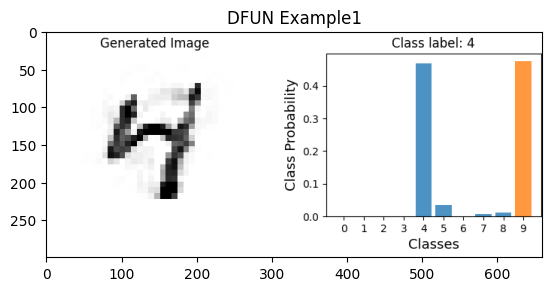

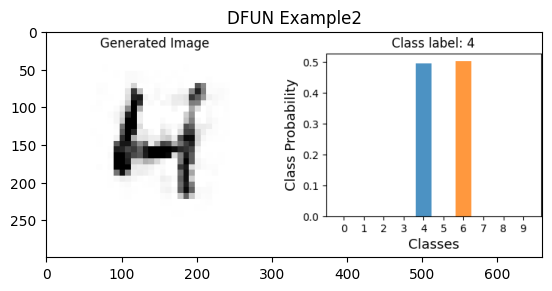

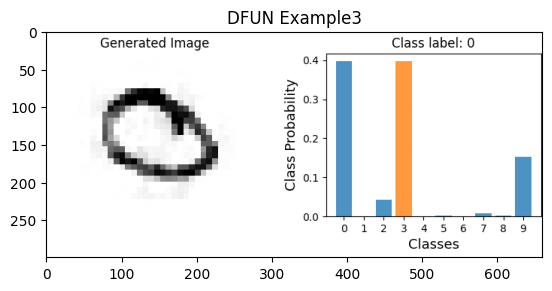

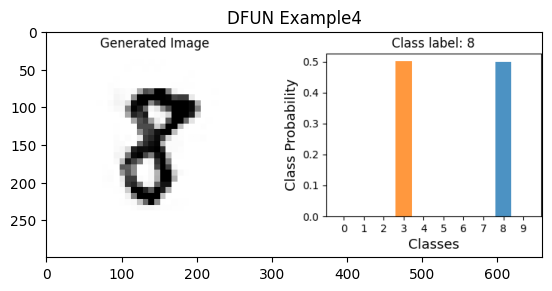

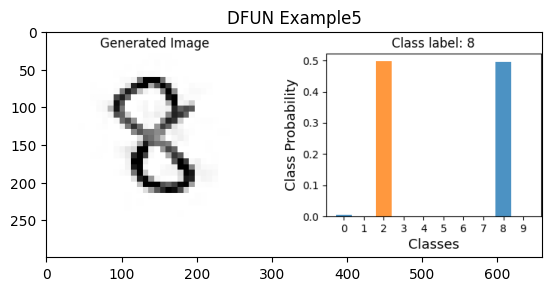

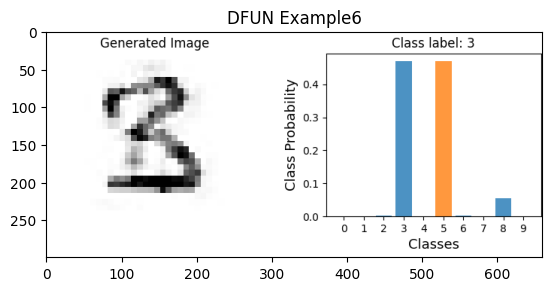

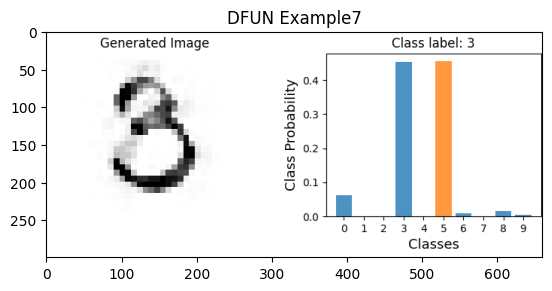

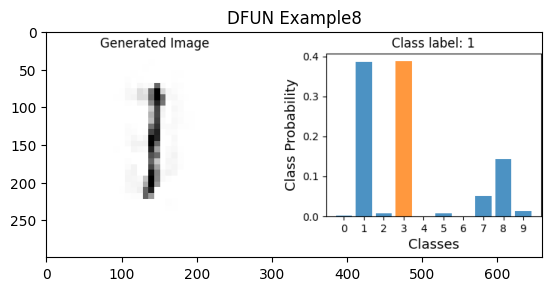

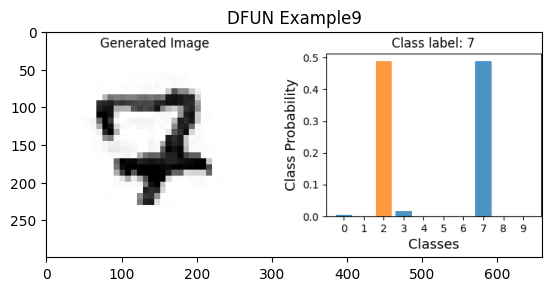

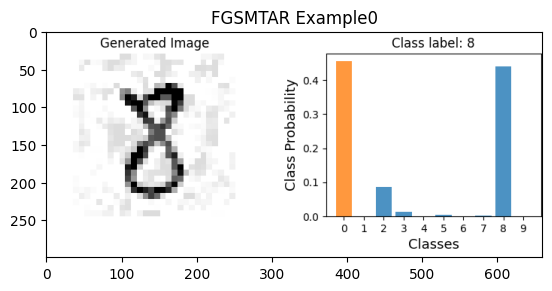

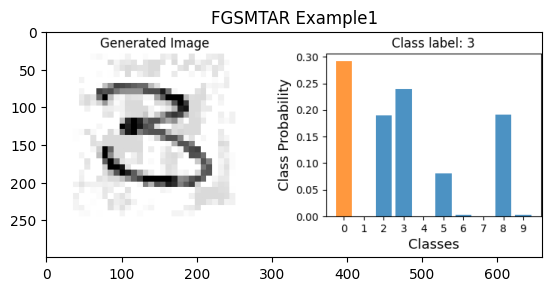

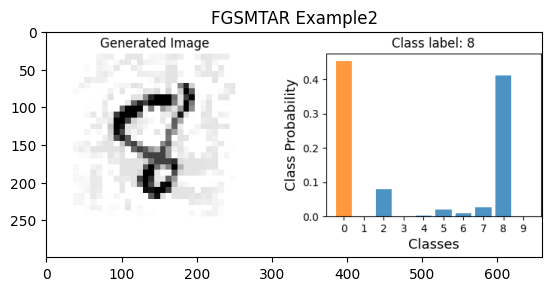

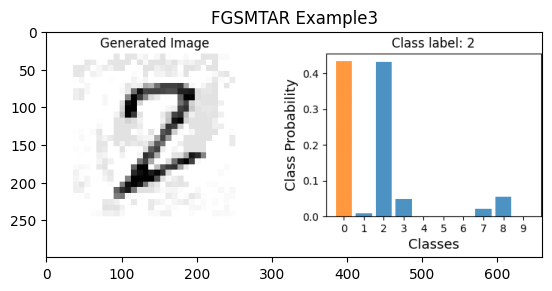

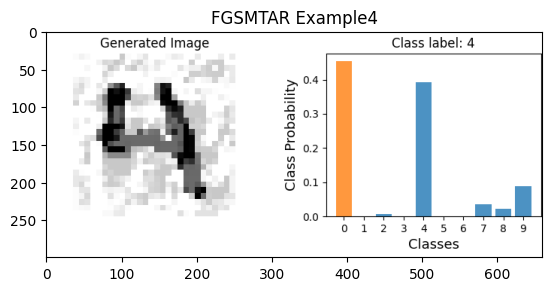

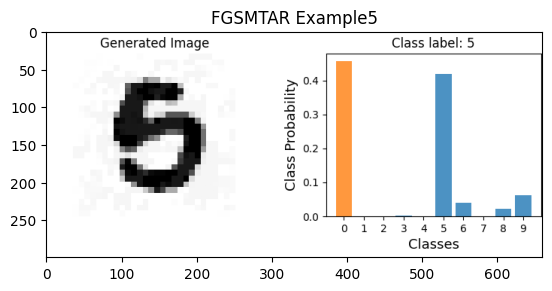

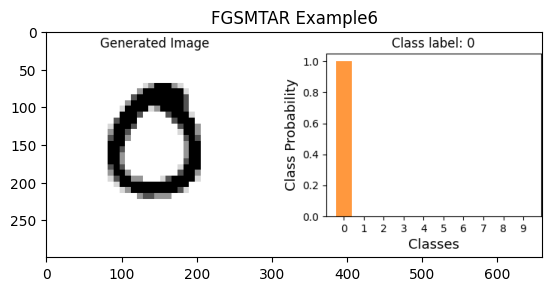

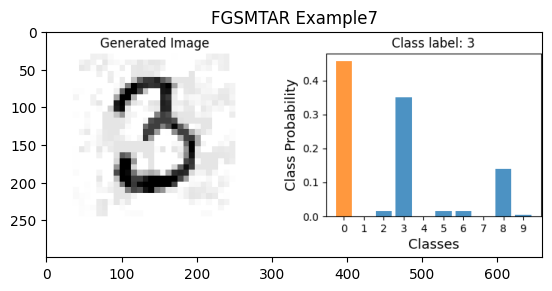

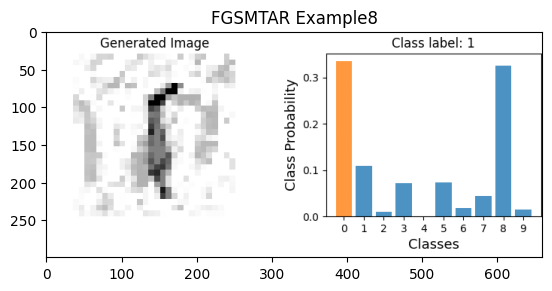

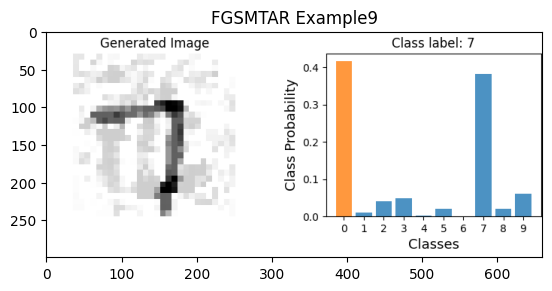

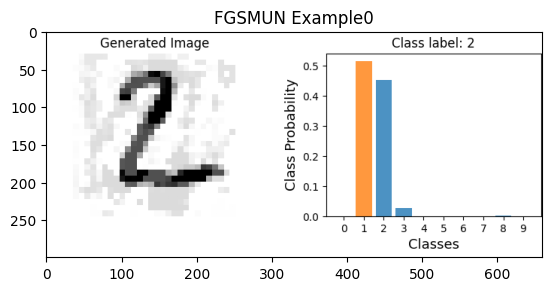

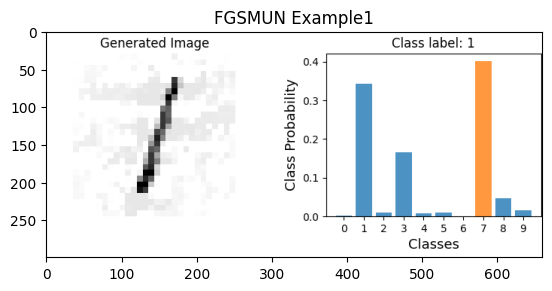

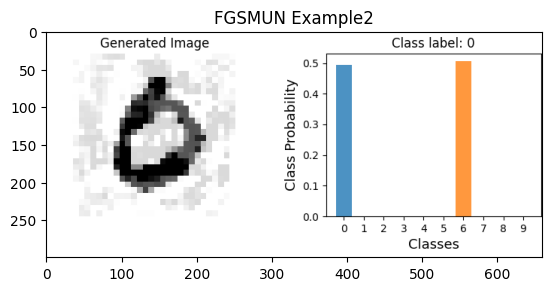

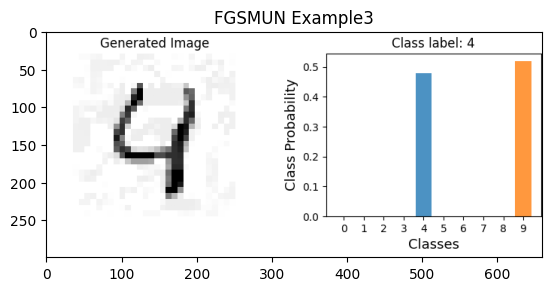

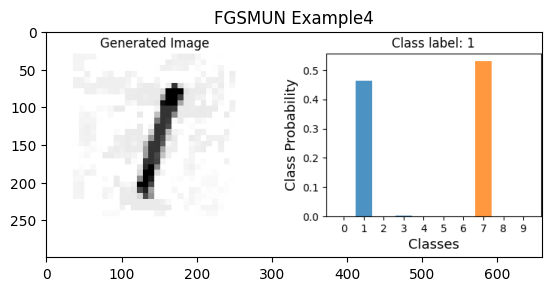

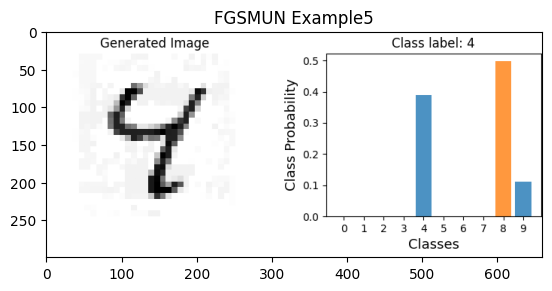

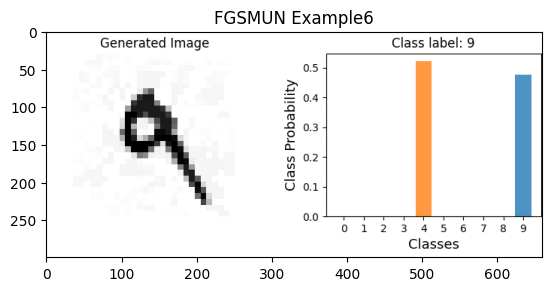

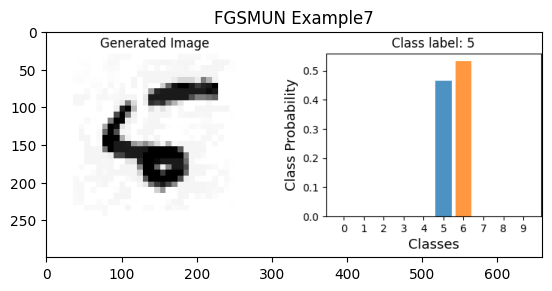

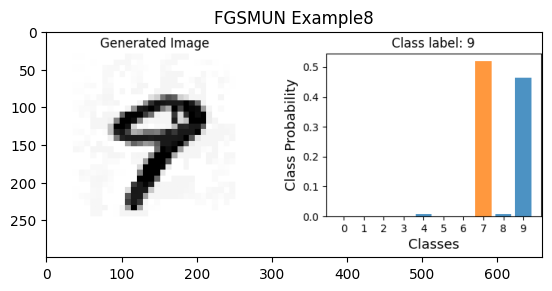

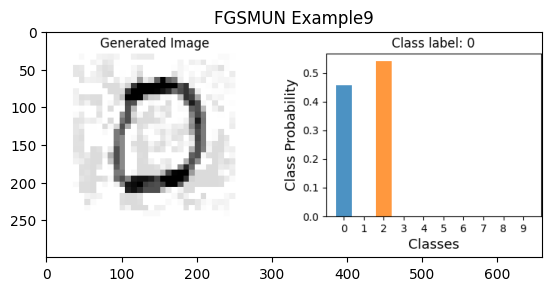

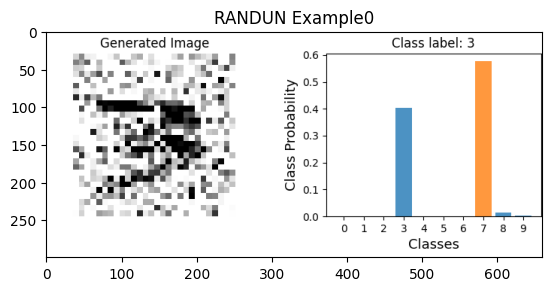

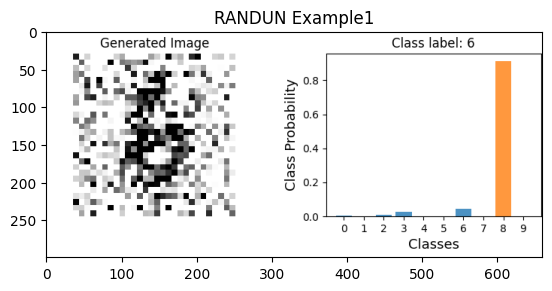

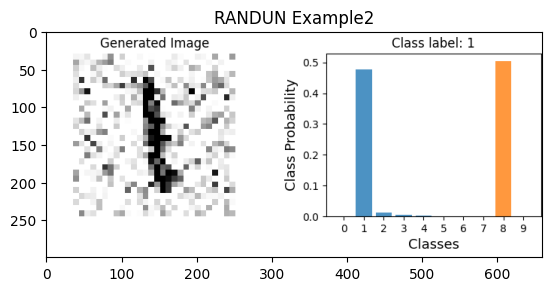

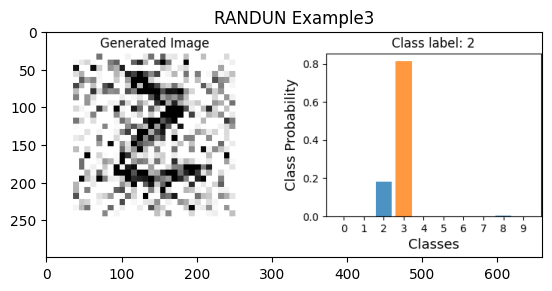

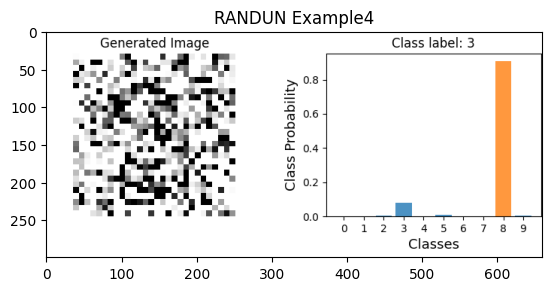

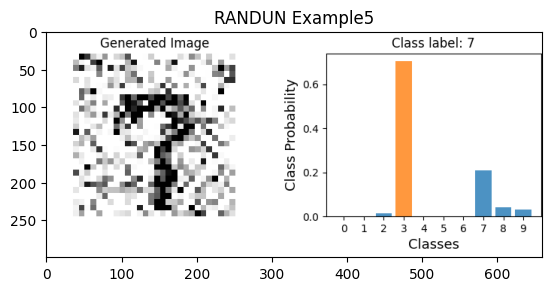

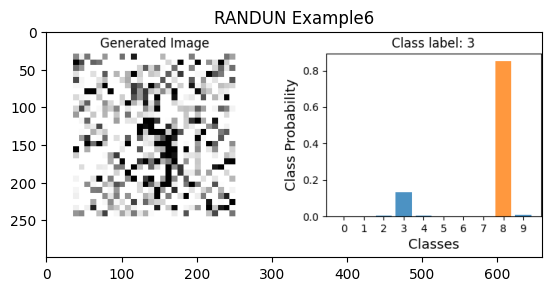

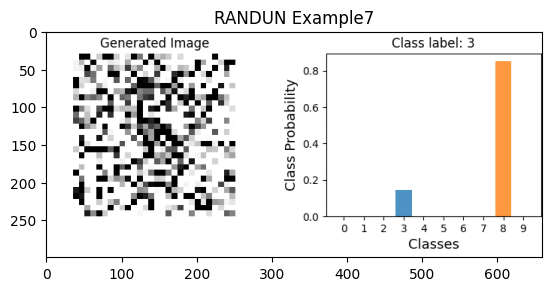

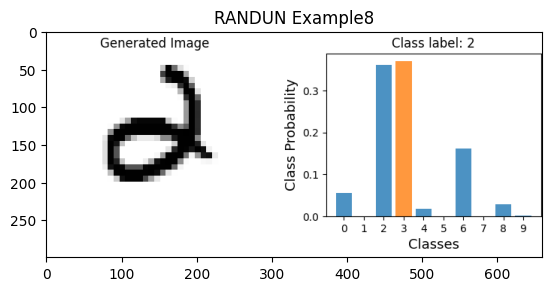

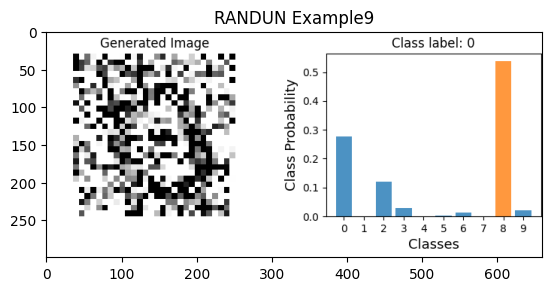

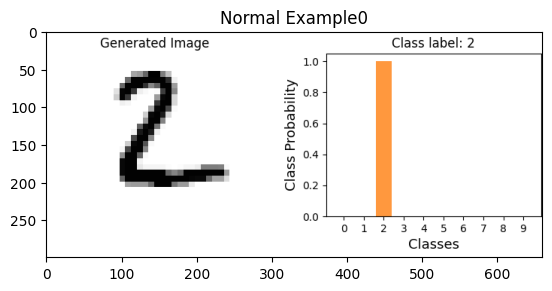

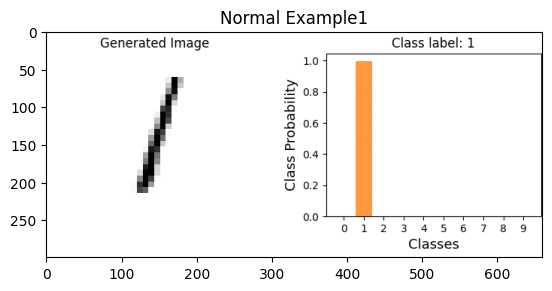

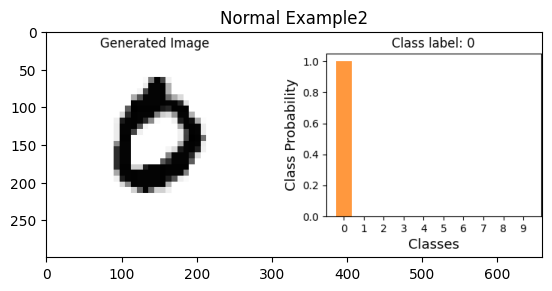

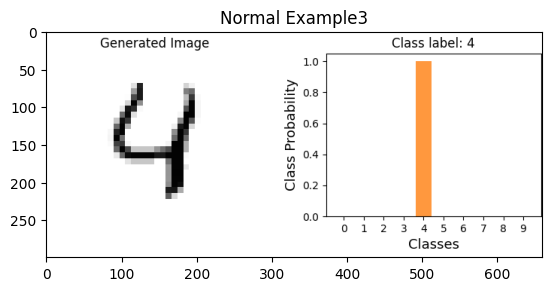

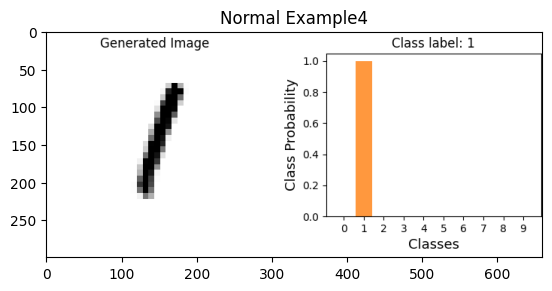

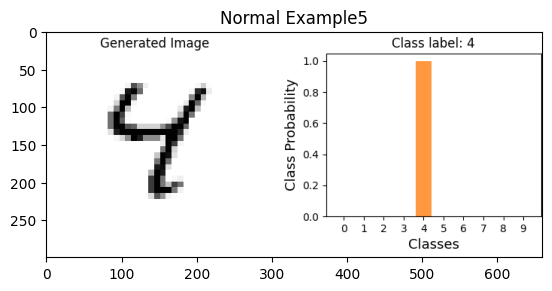

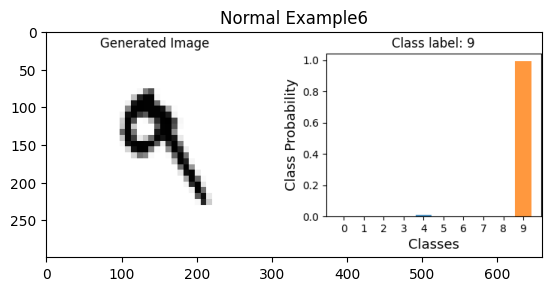

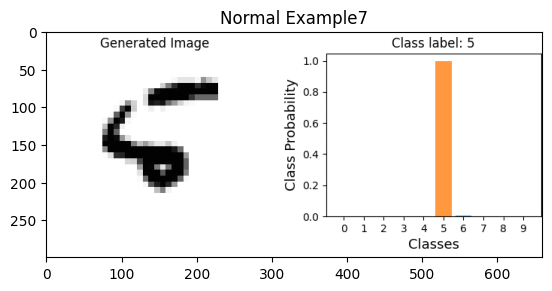

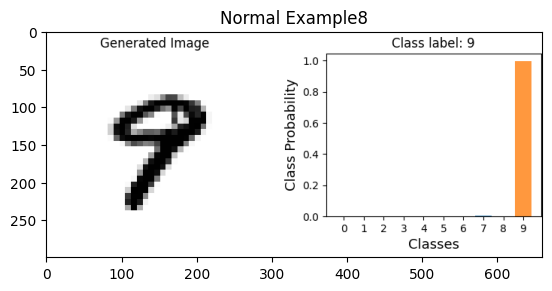

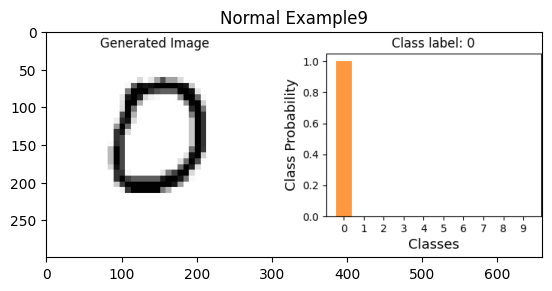

In [45]:
from matplotlib import image as mpimg

folder_dir_1 = "/content/cnwtar_images"
folder_dir_2 = "/content/dftar_images"
folder_dir_3 = "/content/dfun_images"
folder_dir_4 = "/content/fgsmtar_images"
folder_dir_5 = "/content/fgsmun_images"
folder_dir_6 = "/content/normal_images"
folder_dir_7 = "/content/randun_images"

for i in range(10):
  plt.title("CNWTAR Example" + str(i))
  image = mpimg.imread(folder_dir_1 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("DFTAR Example" + str(i))
  image = mpimg.imread(folder_dir_2 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("DFUN Example" + str(i))
  image = mpimg.imread(folder_dir_3 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("FGSMTAR Example" + str(i))
  image = mpimg.imread(folder_dir_4 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("FGSMUN Example" + str(i))
  image = mpimg.imread(folder_dir_5 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("RANDUN Example" + str(i))
  image = mpimg.imread(folder_dir_7 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("Normal Example" + str(i))
  image = mpimg.imread(folder_dir_6 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

#Modeling Adversarial Images

Our goal is to identify whether a given image resembling MNIST is adversarial or not. Each algorithm will be tested for the binary case either 0 unperturbed or 1 perturbed, and the multiclass case where it is either 0 unperturbed or 1-6 perturbed through a specific algorithm. Our inputs to the model will be the leading label and our image 784 pixels.

##Initialize Training And Testing Data
Create our training and testing data with the desired labels which we will pass into our different models to identify adversarial images.

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

def classifierNormalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X

def classifierUnnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8)

with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)

with open('fgsmun_train.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_train.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_train.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_train.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_train.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_train.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

#combine data to train classifier on 4000 true images and 400*6 adversarial images
trainingData = pd.concat([mnist_test[:4000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])

#label training data as true or perturbed 0 is real 1 is perturbed
tfValues = []
for i in range(6400):
    if i < 4000:
        tfValues.append(0)
    else:
        tfValues.append(1)
trainingDataBinary = trainingData.copy()
trainingDataBinary['True/Perturbed'] = tfValues
columns = ['True/Perturbed'] + [col for col in trainingDataBinary.columns if col != 'True/Perturbed']
trainingDataBinary = trainingDataBinary[columns]
trainingDataBinary = trainingDataBinary.sample(frac=1).reset_index(drop=True)

#combine data to train classifier on 4000 true images and  1-6 for each class of adversarial images
classValues = []
for i in range(6400):
    if i < 4000:
        classValues.append(0)
    elif i < 4400:
        classValues.append(1)
    elif i < 4800:
        classValues.append(2)
    elif i < 5200:
        classValues.append(3)
    elif i < 5600:
        classValues.append(4)
    elif i < 6000:
        classValues.append(5)
    else:
        classValues.append(6)
trainingDataClass = trainingData.copy()
trainingDataClass['Class'] = classValues
columns = ['Class'] + [col for col in trainingDataClass.columns if col != 'Class']
trainingDataClass = trainingDataClass[columns]
trainingDataClass = trainingDataClass.sample(frac=1).reset_index(drop=True)

with open('mnist_test.pkl', 'rb') as fid:
    mnist_test = pickle.load(fid)

with open('fgsmun_test.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_test.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_test.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_test.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_test.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_test.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

#combine data to train classifier on 4000 true images and 400*6 adversarial images
testingData = pd.concat([mnist_test[4000:5000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])

#label training data as true or perturbed 0 is real 1 is perturbed
tfValues = []
for i in range(1600):
    if i < 1000:
        tfValues.append(0)
    else:
        tfValues.append(1)
testingDataBinary = testingData.copy()
testingDataBinary['True/Perturbed'] = tfValues
columns = ['True/Perturbed'] + [col for col in testingDataBinary.columns if col != 'True/Perturbed']
testingDataBinary = testingDataBinary[columns]

#combine data to train classifier on 4000 true images and  1-6 for each class of adversarial images
classValues = []
for i in range(1600):
    if i < 1000:
        classValues.append(0)
    elif i < 1100:
        classValues.append(1)
    elif i < 1200:
        classValues.append(2)
    elif i < 1300:
        classValues.append(3)
    elif i < 1400:
        classValues.append(4)
    elif i < 1500:
        classValues.append(5)
    else:
        classValues.append(6)
testingDataClass = testingData.copy()
testingDataClass['Class'] = classValues
columns = ['Class'] + [col for col in testingDataClass.columns if col != 'Class']
testingDataClass = testingDataClass[columns]

##Binary Tester Method

In [ ]:
def testBinary(data,model):
  returnArr = np.zeros((1, 5))
  return returnArr

##Multiclass Tester Method

Calculates the accuracy and confusion matrices for all classes

In [ ]:
def testClass(data, model):
    modelClass = np.zeros((data.shape[0], 1))
    for i in range(data.shape[0]):
        modelClass[i] = model.predict(classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1))
    returnArr = np.zeros((7, 5))

    #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
    for i in range(7):
        for j in range(len(data)):
            if modelClass[j] != i:
                if data.iloc[j, 0] != i:
                    returnArr[i, 1] += 1
                    returnArr[i, 0] += 1
                else:
                    returnArr[i, 2] +=1
            else:
                if data.iloc[j, 0] != i:
                    returnArr[i, 3] += 1
                else:
                    returnArr[i, 4] += 1
                    returnArr[i, 0] += 1
    returnArr[:,0] = returnArr[:,0]/len(data)
    return returnArr

##Classifiers
Here we will create eight different classifiers to identify adversarial examples. Models using Logistic Regression, Kmeans, Random Forest, and a CNN will be created for both the binary and multiclass training data. Following the creation of the models an option will be given to save the models as pickles which can then be downloaded. Finally a test is output with the accuracy and confusion matrix.

###Classifier with Logistic Regression
Logistic regression works by

####Binary Version
For the binary version of our data we pass into the logistic regression classifier

#####Train Our Classifier

In [ ]:
def isAdversarialLogistic(data):
    return 1

logisticBinaryModel = isAdversarialLogistic(trainingDataBinary)

#####Test Our Classifier

In [ ]:
def testBinaryLogistic(data, model):
  return 1

pnrBinary = testBinaryLogistic(testingDataBinary, logisticBinaryModel)
print(pnrBinary)

####Multiclass Version
For the multiclass logistic regression we train for a maximum of 5000 iterations to limit execution in case of a failure while working with the Saga solver. The additional parameters define our tolerance for a solution and how much regularization we use.

#####Train Our Classifier

In [ ]:
#TRAINING
def whatMethodLogistic(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = LogisticRegression(max_iter=5000, solver='saga', C=1, class_weight='balanced', verbose = 1, tol = 1e-4)#, multi_class='multinomial')
    print(x_train.shape)
    print(y_train.shape)
    print("NaNs in x_train:", np.isnan(x_train).sum())
    print("Infs in x_train:", np.isinf(x_train).sum())
    model.fit(x_train, y_train)
    print("done")
    return model

logisticClassModel = whatMethodLogistic(trainingDataClass)


(6400, 784)
(6400,)
NaNs in x_train: 0
Infs in x_train: 0
convergence after 2607 epochs took 716 seconds
done


Save model here if you desire

In [ ]:
#SAVE MODEL

# Save the model using pickle.dump
with open('logisticClassModel.pkl', 'wb') as file:
    pickle.dump(logisticClassModel, file)

#downloadAll() # You may still need to uncomment this if you want to download the file

#####Test Our Classifier

In [ ]:
#TESTING
np.set_printoptions(suppress=True)
pnrMulticlass = testClass(testingDataClass, logisticClassModel)
print(pnrMulticlass)
#[mnist_test[:4000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted]

[[   0.75125   525.        323.         75.        677.      ]
 [   0.968125 1475.         26.         25.         74.      ]
 [   0.95875  1466.         32.         34.         68.      ]
 [   0.838125 1306.         65.        194.         35.      ]
 [   0.8875   1385.         65.        115.         35.      ]
 [   0.87375  1358.         60.        142.         40.      ]
 [   0.97875  1490.         24.         10.         76.      ]]


###Classifier With Kmeans
A kmeans classifier works by

####Binary Version
For the binary version we

#####Train Our classifier

#####Test Our Classifier

####Multiclass Version
For the multiclass version we

#####Train Our Classifier

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def whatMethodKmeans(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    pca = PCA(n_components=50)
    data_pca = pca.fit_transform(x_train)
    model = KMeans(n_clusters=7, random_state=42)
    model.fit(data_pca)
    return model
trainingDataClassK = pd.concat([mnist_test[3600:4000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])
kmeansClassModel = whatMethodKmeans(trainingDataClassK)

Save model if you desire

In [ ]:
#SAVE MODEL
kmeansClassModel.to_pickle('kmeansClassModel.pkl')
#downloadAll()

#####Test Our classifier

In [ ]:
def testClassK(data, model):
  returnArr = np.zeros((7, 7))
  for i in range(data.shape[0]):
    returnArr[data.iloc[i, 0], model.predict(classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1))] += 1

  return returnArr


#TESTING
np.set_printoptions(suppress=True)
   # Now use 'testingDataPCA' instead of 'testingDataClass' for prediction
testingDataClassK = pd.concat([mnist_test[4900:5000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])
pnrMulticlass = testClassK(testingDataClassK, kmeansClassModel)
print(pnrMulticlass)

[[  0.91       637.           0.          63.           0.        ]
 [  0.87714286 614.           0.          86.           0.        ]
 [  0.72142857 505.           0.         195.           0.        ]
 [  0.82142857 575.           0.         125.           0.        ]
 [  0.93428571 654.           0.          46.           0.        ]
 [  0.82571429 578.           0.         122.           0.        ]
 [  0.91       637.           0.          63.           0.        ]]


###Classifier With Random Forest
A random forest classifier works by

####Binary Version
For the binary version we

#####Train Our classifier

#####Test Our classifier

####Multiclass Version
For the multiclass version we

#####Train Our classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def whatMethodRandomForest(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(x_train, y_train)
    return model

randomForestClassModel = whatMethodRandomForest(trainingDataClass)

      Class  number_label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  \
0         2             6        0        0        0        1        0   
1         0             4        0        0        0        0        0   
2         0             2        0        0        0        0        0   
3         0             9        0        0        0        0        0   
4         0             6        0        0        0        0        0   
...     ...           ...      ...      ...      ...      ...      ...   
6395      0             6        0        0        0        0        0   
6396      1             8        0        0        4       19       19   
6397      0             1        0        0        0        0        0   
6398      6             2       14        0       82      178        0   
6399      3             4        0        0        0        0        0   

      pixel_5  pixel_6  pixel_7  ...  pixel_774  pixel_775  pixel_776  \
0           0        0        0  ...  

Save model if you desire

In [ ]:
#SAVE MODEL
randomForestClassModel.to_pickle('randomForestClassModel.pkl')
#downloadAll()

#####Test Our classifier

In [ ]:
#TESTING
np.set_printoptions(suppress=True)
pnrMulticlass = testClass(testingDataClass, randomForestClassModel)
print(pnrMulticlass)

[[   0.966875  547.          0.         53.       1000.      ]
 [   0.98375  1485.         11.         15.         89.      ]
 [   0.9775   1490.         26.         10.         74.      ]
 [   0.9725   1475.         19.         25.         81.      ]
 [   0.956875 1479.         48.         21.         52.      ]
 [   0.969375 1486.         35.         14.         65.      ]
 [   0.998125 1498.          1.          2.         99.      ]]


###Classifier With Convolutional Neural Network
A CNN classifier works by

##Classifier with Multiclass CNN

####Binary Version
For the binary version we

#####Train Our classifier

Save model if you desire

#####Test Our classifier

####Multiclass Version
For the multiclass version we

#####Train Our classifier

In [ ]:
#Rerunning in case we started with the model already downloaded
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class SimpleNN2(nn.Module):
    """A simple two-layer neural network."""

    def __init__(self):
        super(SimpleNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        c1 = F.relu(self.conv1(x))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        s4 = torch.flatten(s4, 1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6)
        return output

    def predict(self, x):
        with torch.no_grad():
            x = x.reshape(-1, 1, 28, 28)
            x = torch.tensor(x, dtype=torch.float32)
            output = self(x)
            return torch.softmax(output, dim=1).detach().numpy()

    def gradient(self, x, y):
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)
        self.eval()
        x.requires_grad = True
        output = self(x)
        loss = F.cross_entropy(output, y)
        self.zero_grad()
        loss.backward()
        return x.grad.numpy()

In [ ]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle

x_train = np.array([normalize(trainingDataClass.iloc[i, 2:].values) for i in range(trainingDataClass.shape[0])])
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
y_train = trainingDataClass.iloc[:, 0].values
try:
    train_dataset = TensorDataset(
        torch.from_numpy(x_train),
        torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)


#init model on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = SimpleNN2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

#train over 10 epochs
def train(train_loader, epochs=10):
    #Train the model with a DataLoader.
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (data, target) in enumerate(train_loader, 0):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model2(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

train(train_loader, epochs=100)

Epoch 1/100, Loss: 1.8252
Epoch 2/100, Loss: 1.3679
Epoch 3/100, Loss: 1.3130
Epoch 4/100, Loss: 1.2713
Epoch 5/100, Loss: 1.2203
Epoch 6/100, Loss: 1.1636
Epoch 7/100, Loss: 1.1100
Epoch 8/100, Loss: 1.0511
Epoch 9/100, Loss: 0.9795
Epoch 10/100, Loss: 0.8900
Epoch 11/100, Loss: 0.8041
Epoch 12/100, Loss: 0.7375
Epoch 13/100, Loss: 0.7160
Epoch 14/100, Loss: 0.6899
Epoch 15/100, Loss: 0.6559
Epoch 16/100, Loss: 0.6614
Epoch 17/100, Loss: 0.6327
Epoch 18/100, Loss: 0.6149
Epoch 19/100, Loss: 0.6142
Epoch 20/100, Loss: 0.6292
Epoch 21/100, Loss: 0.5846
Epoch 22/100, Loss: 0.5770
Epoch 23/100, Loss: 0.5500
Epoch 24/100, Loss: 0.5432
Epoch 25/100, Loss: 0.5255
Epoch 26/100, Loss: 0.5433
Epoch 27/100, Loss: 0.5190
Epoch 28/100, Loss: 0.4988
Epoch 29/100, Loss: 0.5039
Epoch 30/100, Loss: 0.4814
Epoch 31/100, Loss: 0.4751
Epoch 32/100, Loss: 0.4522
Epoch 33/100, Loss: 0.4597
Epoch 34/100, Loss: 0.4415
Epoch 35/100, Loss: 0.4406
Epoch 36/100, Loss: 0.4143
Epoch 37/100, Loss: 0.4033
Epoch 38/1

Save model if you desire

In [ ]:
#save model
try:
    with open('cnnClassModel.pkl', 'wb') as fid:
        pickle.dump(model2, fid)
except Exception as e:
    print(f"Error saving model: {e}")

#####Test Our classifier

In [ ]:
def testClassCNN(data, model):
    modelClass = np.zeros((data.shape[0], 1))
    for i in range(data.shape[0]):
        modelClass[i] = np.argmax(model.predict(normalize(data.iloc[i, 2:].values).reshape(1, -1)))
    returnArr = np.zeros((7, 5))

    #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
    for i in range(7):
        for j in range(len(data)):
            if modelClass[j] != i:
                if data.iloc[j, 0] != i:
                    returnArr[i, 1] += 1
                    returnArr[i, 0] += 1
                else:
                    returnArr[i, 2] +=1
            else:
                if data.iloc[j, 0] != i:
                    returnArr[i, 3] += 1
                else:
                    returnArr[i, 4] += 1
                    returnArr[i, 0] += 1
    returnArr[:,0] = returnArr[:,0]/len(data)
    return returnArr

pnrMulticlass = testClassCNN(testingDataClass, model2)
print(pnrMulticlass)

[[   0.963125  542.          1.         58.        999.      ]
 [   0.98875  1487.          5.         13.         95.      ]
 [   0.984375 1498.         23.          2.         77.      ]
 [   0.9675   1488.         40.         12.         60.      ]
 [   0.945625 1489.         76.         11.         24.      ]
 [   0.94375  1432.         22.         68.         78.      ]
 [   0.995625 1495.          2.          5.         98.      ]]


#Visualize Models

##Visualize Binary Logistic Regression

##Visualize Muliclass Logistic Regression

##Visualize Binary Kmeans

##Visualize Multiclass Kmeans

##Visualize Binary Random Forest

##Visualize Multiclass Random Forest

##Visualize Binary Convolutional Neural Network

##Visualize Multiclass Convolutional Neural Network

#Sources
https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

https://medium.com/machine-intelligence-and-deep-learning-lab/a-review-of-deepfool-a-simple-and-accurate-method-to-fool-deep-neural-networks-b016fba9e48e

https://medium.com/@zachariaharungeorge/adversarial-attacks-with-carlini-wagner-approach-8307daa9a503

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

https://gist.github.com/bveliqi/61d1a77221f3faaaee7660a9badf552f